In [59]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import clear_output

mpl.rcParams['agg.path.chunksize'] = 10000

print(tf.__version__)
np.set_printoptions(precision=2)

2.6.0


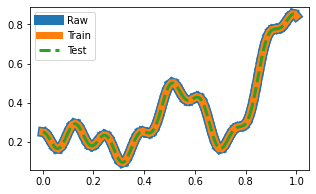

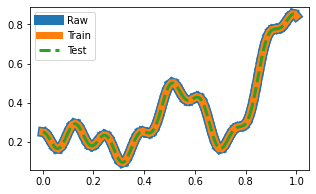

In [72]:
# function which the Deep Neural Network has to 'learn'
f = lambda x: 0.2 + 0.4 * x ** 2 + 0.3 * x * np.sin(15 * x) + 0.05 * np.cos(50 * x)
X = np.linspace(0, 1, 1000001).reshape((-1, 1))  # the 'features'
y = f(X)  # the 'labels'

# Train/Test Dataset for Validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2
)

def plot_data(X_train, X_test, y_train, y_test ):
    train_df = pd.DataFrame(dict(x=X_train.flatten(), y=y_train.flatten()))
    train_df = train_df.sort_values(by='x')
    test_df = pd.DataFrame(dict(x=X_test.flatten(), y=y_test.flatten()))
    test_df = test_df.sort_values(by='x')
    raw_df = pd.concat([train_df, test_df])
    raw_df = raw_df.sort_values(by='x')
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot(raw_df.x, raw_df.y, label="Raw",lw=10)
    ax.plot(train_df.x, train_df.y, label="Train",lw=7)
    ax.plot(test_df.x, test_df.y, label="Test",lw=3, ls="--")
    ax.legend()
    fig.show()

plot_data(X_train, X_test, y_train, y_test )

# Define DNN

In [89]:
def build_and_compile_model():
    model = keras.Sequential([
        keras.Input(shape=(1,)), # will need to increase this if using more parameters
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model


dnn_model = build_and_compile_model()
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


# Make some plotting functions (training diagnostics)

In [90]:
SAVE_PLOTS = False

class PlotLearning(keras.callbacks.Callback):
    # This will allow us to plot the predictions evey epoch of training
    def on_epoch_end(self, epoch, logs={}):
        compare_true_vs_mla_plot(self.model, title=f"Epoch: {epoch}")
        if SAVE_PLOTS:
            plt.savefig(f"training_epoch_{epoch:003}.png")
            plt.close()
        else:
            clear_output(wait=True)
            plt.show()


def compare_true_vs_mla_plot(model, title=""):
    x = np.linspace(0, 1, 10000).reshape((-1, 1))
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot(x, f(x), label="True", lw=5)
    ax.plot(x, model.predict(x), label="MLA",lw=3,ls="--")
    if title:
        plt.suptitle(title)
    ax.legend()


def plot_loss(history):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot(history.history['loss'], label='loss', lw=5)
    ax.plot(history.history['val_loss'], label='val_loss',lw=5)
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

# Run training

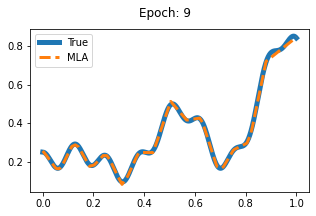

CPU times: user 4min 14s, sys: 1min 19s, total: 5min 34s
Wall time: 2min 44s


In [91]:
%%time
history = dnn_model.fit(
    X_train,
    y_train,
    callbacks=[PlotLearning()],
    validation_split=0.2,
    verbose=0, epochs=10)

# Post-training diagnostics

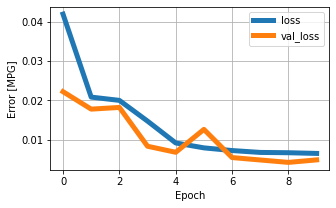

In [92]:
plot_loss(history)

Text(0.5, 0, 'pred-true')

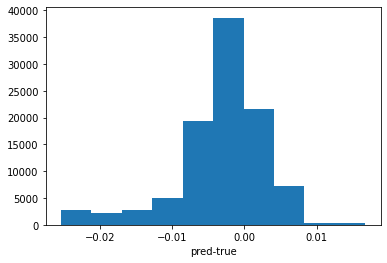

In [93]:
y_pred = dnn_model.predict(X_test)
plt.hist(y_pred - y_test)
plt.xlabel("pred-true")

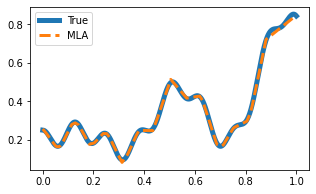

In [94]:
compare_true_vs_mla_plot(dnn_model)